# MQT Qudits 🌌
*Discover a New Dimension in Quantum Computing*

Embark on a journey with MQT Qudits, a cutting-edge toolkit for Mixed-Dimensional Quantum Computing.

<br>
<p>Delve into the realm of mixed-dimensional quantum computing with NeQST—a project funded by the European Union and developed at the <a href="https://www.cda.cit.tum.de/" target="_blank">Chair for Design Automation</a> at the Technical University of Munich, as part of the <a href="https://www.cda.cit.tum.de/research/quantum/mqt/" target="_blank">Munich Quantum Toolkit</a>.</p> Our team is focused on creating design automation methods and software for quDit-based systems. Explore our Jupyter file to discover the initial tools and contributions we've made to advance Quantum Information Processing for Science and Technology.
<img src="foot.png" alt="Logo 1" width="400"/> 




## Installation steps:


```
!pip install mqt.qudits
```

For those seeking hands-on customization, simply clone our repository and execute the installation script:

```
git clone git@github.com:KevinMTO/mqt-qudits.git
```

# User Inputs 💻

🚀 **New QASM Extension:**
Dive into a language meticulously designed to express quantum algorithms and circuits. MQT extends the openQASM 2.0 grammar, effortlessly adapting to registers that feature a harmonious mix of qudits and qubits in diverse combinations. 

🐍 **Python Interface** 

Constructing and manipulating quantum programs becomes a breeze with Python. You have the flexibility to:

1. **Initialize Quantum Circuits:** Start by creating your quantum circuits effortlessly.

2. **Create Quantum Registers:** Build dedicated quantum registers tailored to your needs.

3. **Compose Circuits:** Seamlessly bring together your quantum registers, forming a unified and powerful circuit.

4. **Apply Operations:** Easily apply a variety of qudit operations, without worrying about the right representation. 




In [ ]:
import numpy as np

from mqt.qudits.qudit_circuits.circuit import QuantumCircuit

After the import of the quantum circuit object, it is possible starting from a __DITQASM__ program to automatically create a circuit and manipulate it, if not simulate it or compile it to a more suitable gate-set for the machine.
In the next cell the program is explicitly written, although several methods for importing programs from files are present in the library.

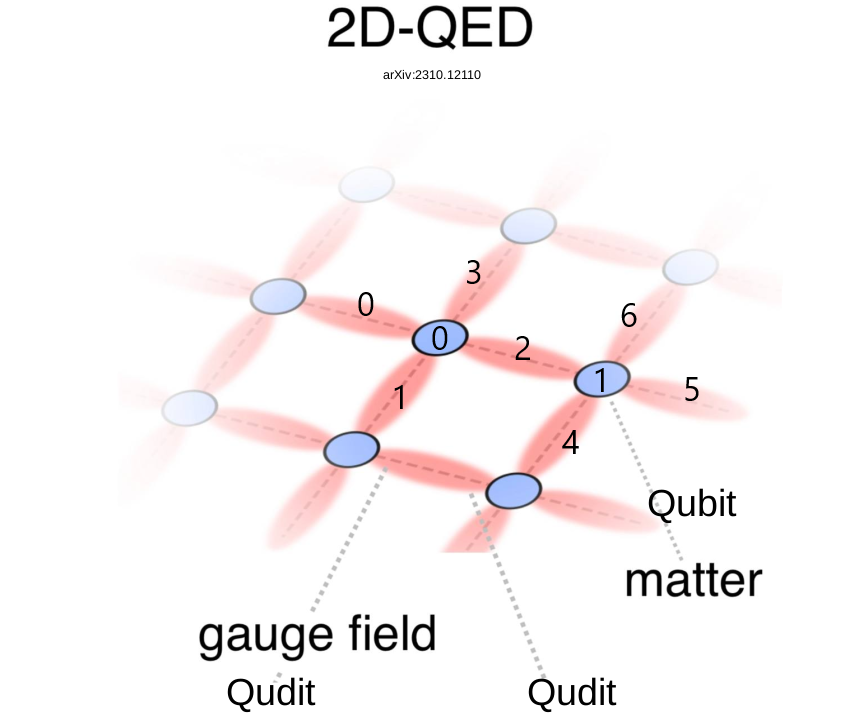

In [ ]:
qasm = """
        DITQASM 2.0;
        
        qreg field [7][5,5,5,5,5,5,5];
        qreg matter [2];
        
        creg meas_matter[7];
        creg meas_fields[3];
        
        h matter[0] ctl field[0] field[1] [0,0];
        cx field[2], matter[0];
        cx field[2], matter[1];
        rxy (0, 1, pi, pi/2) field[3];
        
        measure q[0] -> meas[0];
        measure q[1] -> meas[1];
        measure q[2] -> meas[2];
        """

A new feature is the __control syntax__: _operation_   __ctl__  _quditline_  \[list of qudit control levels\]
<br>
We can import the QASM program and construct a quantum circuit.


In [ ]:
circuit = QuantumCircuit()
circuit.from_qasm(qasm)

print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")

In [ ]:
circuit.dimensions

##### Let's construct a quantum circuit from scratch, with the python interface.
<br>

In [ ]:
from mqt.qudits.qudit_circuits.components.registers.quantum_register import QuantumRegister

circuit = QuantumCircuit()

field_reg = QuantumRegister("fields", 1, [7])
matter_reg = QuantumRegister("matter", 1, [2])

circuit.append(field_reg)
circuit.append(matter_reg)

print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")

In [ ]:
circuit.gate_set

##### No operations were inserted yet, let's take a look at how operations can be applied!

The size of every line is detected automatically and the right operations are applied to the right qudits

In [ ]:
h = circuit.h(field_reg[0])

In [ ]:
csum = circuit.csum([field_reg[0], matter_reg[0]])

In [ ]:
print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")


##### It is possible to export the code as well and share your program in a QASM file.
<br>

In [ ]:
print(circuit.to_qasm())

#### Let's save the circuit to file

In [ ]:
circuit.save_to_file("my_circuit", "/home/k3vn/Desktop")

#### Load from file

In [ ]:
circuit.load_from_file("/home/k3vn/Desktop/my_circuit.qasm")

print("Program:\n\n", circuit.to_qasm())
print("Dimensions: ", circuit.dimensions)

### Custom gates

In [ ]:
n = 5
random_matrix = np.random.randn(n, n) + 1j * np.random.randn(n, n)

Q, R = np.linalg.qr(random_matrix)

unitary_matrix = Q
cu = circuit.cu_one(field_reg[0], unitary_matrix)

##### Gates follow the order:
- target qudit/s : list or single number
- parameters lis with order lower level, upper level, control level, theta, phi
- control data

In [ ]:
r = circuit.r(field_reg[0], [0, 1, np.pi / 5, np.pi / 7])

In [ ]:
from mqt.qudits.qudit_circuits.components.instructions.gate_extensions.controls import ControlData

r_c1 = circuit.r(field_reg[0], [0, 1, np.pi / 5, np.pi / 7], ControlData([matter_reg[0]], [1]))

In [ ]:
r_c2 = circuit.r(field_reg[0], [0, 1, np.pi / 5, np.pi / 7]).control([matter_reg[0]], [1])

##### Representation of the matrix is dynamic:
- 0: no identities
- 1: identities in between long-range gates are introduced
- 2: full circuit unitary

In [ ]:
print(r._name)

In [ ]:
r.to_matrix()

##### you can dagger a gate anytime


In [ ]:
rd = r.dag()
print(rd._name)

In [ ]:
rd.to_matrix()

In [ ]:
r_c1.control_info

##### Two and Multi qudits gates follow the rule:
- two : target_qudits first is control, second is target
- multi: all are controls, except last one is target

In [ ]:
r_c1.reference_lines

# Simulation 🚀

After crafting your quantum circuit with precision, take it for a spin using two distinct engines, each flaunting its unique set of data structures.

- **External Tensor-Network Simulator:** Delve into the quantum realm with a robust external tensor-network simulator. Can simulate all the gate-set.

- **MiSiM (C++-Powered):** Unleash the power of decision-diagram-based simulation with MiSiM, seamlessly interfaced with Python for a fluid and efficient experience. 🌐💡 Can simulate only the machine set.

#### Supported by MISIM now:
csum
cx
h
rxy
rz
virtrz
s
x
z


In [ ]:
from mqt.qudits.qudit_circuits.components.registers.quantum_register import QuantumRegister

circuit = QuantumCircuit()

field_reg = QuantumRegister("fields", 1, [3])
matter_reg = QuantumRegister("matter", 1, [3])

circuit.append(field_reg)
circuit.append(matter_reg)

h = circuit.h(field_reg[0])
csum = circuit.csum([field_reg[0], matter_reg[0]])

print(f"\n Number of operations: {len(circuit.instructions)}, \n Number of qudits in the circuit: {circuit.num_qudits}")

In [ ]:
from mqt.qudits.simulation.provider.qudit_provider import MQTQuditProvider

provider = MQTQuditProvider()
provider.backends("sim")

In [ ]:
from mqt.qudits.visualisation.plot_information import plot_counts, plot_state

backend = provider.get_backend("tnsim")

job = backend.run(circuit)
result = job.result()

state_vector = result.get_state_vector()

plot_state(state_vector, circuit)

In [ ]:
backend = provider.get_backend("misim")

job = backend.run(circuit)
result = job.result()

state_vector = result.get_state_vector()

plot_state(state_vector, circuit)

### Extending Engines with Noise Model and Properties for FakeBackend

Enhance your quantum simulation experience by extending the engines with a noise model and incorporating various properties. This process allows you to create a FakeBackend, inspired by the best machines in experimental laboratories.

#### Noise Model Integration

Introduce realism into your simulations by incorporating a noise model. Simulate the effects of environmental factors and imperfections, bringing your quantum algorithms closer to real-world scenarios.


#### Creating a FakeBackend

By combining a noise model and carefully tuned properties, you can craft a FakeBackend that closely emulates the performance of the best quantum machines in experimental laboratories. This allows for more realistic and insightful quantum simulations.

Experiment, iterate, and simulate quantum circuits with the sophistication of real-world conditions, all within the controlled environment of your simulation. 🛠️🔬


In [ ]:
from mqt.qudits.simulation.provider.noise_tools.noise import Noise, NoiseModel

# Depolarizing quantum errors
local_error = Noise(probability_depolarizing=0.001, probability_dephasing=0.001)
local_error_rz = Noise(probability_depolarizing=0.03, probability_dephasing=0.03)

entangling_error = Noise(probability_depolarizing=0.1, probability_dephasing=0.001)
entangling_error_extra = Noise(probability_depolarizing=0.1, probability_dephasing=0.1)

entangling_error_on_target = Noise(probability_depolarizing=0.1, probability_dephasing=0.0)
entangling_error_on_control = Noise(probability_depolarizing=0.01, probability_dephasing=0.0)

# Add errors to noise_tools model

noise_model = NoiseModel()  # We know that the architecture is only two qudits
# Very noisy gate
noise_model.add_all_qudit_quantum_error(local_error, ["csum"])
noise_model.add_recurrent_quantum_error_locally(local_error, ["csum"], [0])
# Entangling gates
noise_model.add_nonlocal_quantum_error(entangling_error, ["cx", "ls", "ms"])
noise_model.add_nonlocal_quantum_error_on_target(entangling_error_on_target, ["cx", "ls", "ms"])
noise_model.add_nonlocal_quantum_error_on_control(entangling_error_on_control, ["csum", "cx", "ls", "ms"])
# Super noisy Entangling gates
noise_model.add_nonlocal_quantum_error(entangling_error_extra, ["csum"])
# Local Gates
noise_model.add_quantum_error_locally(local_error, ["h", "rxy", "s", "x", "z"])
noise_model.add_quantum_error_locally(local_error_rz, ["rz", "virtrz"])

print(noise_model.quantum_errors)

##### We can set the noise model for the simulation, but also set several other flags:
- shots : number of shots for the stochatsic simulation
- memory : flag for saving shots (True/False)
- full_state_memory: save the full noisy states 
- file_path: file path of the h5 database storing the data#
- file_name

In [ ]:
backend = provider.get_backend("tnsim")

job = backend.run(circuit, noise_model=noise_model)

result = job.result()
counts = result.get_counts()

plot_counts(counts, circuit)

## Fakebackends
#### You can invoke also a fake banckend a retrieve a few relevant properties, that already embedded in them

In [ ]:
provider = MQTQuditProvider()
provider.backends("fake")

In [ ]:
backend_ion = provider.get_backend("faketraps2trits", shots=1000)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

mapping = backend_ion.energy_level_graphs

pos = nx.circular_layout(mapping[0])
nx.draw(mapping[0], pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=12, font_weight="bold")
plt.show()

In [ ]:
job = backend_ion.run(circuit)
result = job.result()
counts = result.get_counts()

plot_counts(counts, circuit)

## Compilation ⚙️

Tailor your quantum compilation process to achieve optimal performance and emulate the intricacies of experimental setups.

#### Compiler Customization with Modern Passes

1. **Optimization Strategies:** Implement specific optimization strategies based on your quantum algorithm's characteristics. Fine-tune compilation for better resource utilization and reduced gate counts.

2. **Gate Decomposition:** Customize gate decomposition techniques to match the capabilities of experimental quantum hardware. Aligning with the native gate set enhances the efficiency of your compiled circuits.

##### Experimental-Inspired Compilation

Emulate the features of the best experimental laboratories in your compilation process. Leverage modern compiler passes to customize optimization, gate decomposition, and noise-aware strategies, creating compiled circuits that closely resemble the challenges and advantages of cutting-edge quantum hardware.

Customize, compile, and push the boundaries of quantum algorithms with a tailored approach to quantum compilation. 🛠️🔧🚀


In [ ]:
from mqt.qudits.compiler.dit_manager import QuditCompiler

In [ ]:
qudit_compiler = QuditCompiler()

passes = ["PhyLocQRPass"]

In [ ]:
compiled_circuit_qr = qudit_compiler.compile(backend_ion, circuit, passes)

print(
    f"\n Number of operations: {len(compiled_circuit_qr.instructions)}, \n Number of qudits in the circuit: {compiled_circuit_qr.num_qudits}"
)

In [ ]:
job = backend_ion.run(compiled_circuit_qr)

result = job.result()
counts = result.get_counts()

plot_counts(counts, compiled_circuit_qr)

In [ ]:
passes = ["PhyLocAdaPass", "ZPropagationPass", "ZRemovalPass"]

compiled_circuit_ada = qudit_compiler.compile(backend_ion, circuit, passes)

print(
    f"\n Number of operations: {len(compiled_circuit_ada.instructions)}, \n Number of qudits in the circuit: {compiled_circuit_ada.num_qudits}"
)

In [ ]:
job = backend_ion.run(compiled_circuit_ada)

result = job.result()
counts = result.get_counts()

plot_counts(counts, compiled_circuit_ada)

In [ ]:
from mqt.qudits.visualisation.drawing_routines import draw_qudit_local

draw_qudit_local(compiled_circuit_ada)